In [1]:
# import sys
# !{sys.executable} -m pip install platform

In [220]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import ssl
import sys
import urllib.request
import json
import pandas as pd
import numpy as np
import platform

from tqdm import tqdm_notebook
from time import sleep
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bs
from fake_useragent import UserAgent
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


In [221]:
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Set Hangul of Darwin")
    rc("font", family="Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Set Hangul of Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    
else:
    print("Unknown system. Error Hangul")
    
plt.rcParams["axes.unicode_minus"] = False

Set Hangul of Windows


In [222]:
client_id = "tYZU6L0DOk2rmPWDjnDK"
client_secret = "aw0kxfUYO1"

In [223]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    '''
    # 내용 : 네이버 검색 API 주소 생성 함수
    # 리턴 : 주소
    '''
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [224]:
def get_result_onpage(url):
    '''
    # 내용 : 네이버 검색 API 요청 함수
    # 리턴 : 결과
    '''
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.now())
    
    return json.loads(response.read().decode("utf-8"))

In [225]:
def delete_tag(input_str):
    '''
    # 내용 : HTML b Tag를 삭제
    # 리턴 : 삭제된 문자열
    '''
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [226]:
def get_tiobe_rank():
    '''
    # 내용 : TIOBE 페이지의 언어별 Rank 테이블 검색
    # 리턴 : TIOBE RANK 테이블 정보(DataFrame)
    '''
    url = "https://www.tiobe.com/tiobe-index"
    page = urlopen(url)
    soup = bs(page, "html.parser")

    table = soup.find("table", id="top20")
    df = pd.read_html(str(table))[0]
    return df
    

In [227]:
# TIOBE 랭킹 데이터 선언
df_tiobe = get_tiobe_rank()

In [228]:
df_tiobe

,Oct 2021,Oct 2020,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,3,NaN,NaN,Python,11.27%,-0.00%
1,2,1,NaN,NaN,C,11.16%,-5.79%
2,3,2,NaN,NaN,Java,10.46%,-2.11%
3,4,4,NaN,NaN,C++,7.50%,+0.57%
4,5,5,NaN,NaN,C#,5.26%,+1.10%
5,6,6,NaN,NaN,Visual Basic,5.24%,+1.27%
6,7,7,NaN,NaN,JavaScript,2.19%,+0.05%
7,8,10,NaN,NaN,SQL,2.17%,+0.61%
8,9,8,NaN,NaN,PHP,2.10%,+0.01%
9,10,17,NaN,NaN,Assembly language,2.06%,+0.99%


In [232]:
# 인기 프로그래밍 언어 1위 ~ 9위와 R프로그래밍 언어를 선택
df_tiobe_top_10 = df_tiobe[ (df_tiobe["Oct 2021"] <= 9) | (df_tiobe["Programming Language.1"] == "R") ].reset_index(drop=True)
df_tiobe_top_10

,Oct 2021,Oct 2020,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,3,NaN,NaN,Python,11.27%,-0.00%
1,2,1,NaN,NaN,C,11.16%,-5.79%
2,3,2,NaN,NaN,Java,10.46%,-2.11%
3,4,4,NaN,NaN,C++,7.50%,+0.57%
4,5,5,NaN,NaN,C#,5.26%,+1.10%
5,6,6,NaN,NaN,Visual Basic,5.24%,+1.27%
6,7,7,NaN,NaN,JavaScript,2.19%,+0.05%
7,8,10,NaN,NaN,SQL,2.17%,+0.61%
8,9,8,NaN,NaN,PHP,2.10%,+0.01%
9,14,9,NaN,NaN,R,1.20%,-0.79%


### Naver API 검색 
- 검색어 : [프로그래밍 언어이름] programming -> ex) Python programming
- 차후 중복 검색은 isbn 으로 drop_duplicate()

In [238]:
data = []

for idx, rows in tqdm_notebook(df_tiobe_top_10.iterrows()):
    # 프로그래밍 언어 이름 선언
    lang = rows["Programming Language.1"].strip()
    rank = rows["Oct 2021"]
    # API URL 선언 
    # 검색어 : [언어이름] 프로그래밍
    for num in range(1, 300, 100): # 언어별로 300개씩 조회하여 리서치
        url = gen_search_url("book", f"{lang} 프로그래밍", num, 100)

        # API Request
        results = get_result_onpage(url)
        items = results["items"]

        # Row별 언어 이름 추가
        for it in items:
            it["language"] = lang
            it["rank"] = rank
            
            # 출간일 정보의 양식이 YYYYMMDD로 일치하지 않으면 수집 X
            if len(it["pubdate"]) < 5:
                continue
                
            data.append(it)

        sleep(1)

<ipython-input-238-d5a7a34beeff>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, rows in tqdm_notebook(df_tiobe_top_10.iterrows()):


0it [00:00, ?it/s]

[2021-10-20 19:54:16.607881] Url Request Success
[2021-10-20 19:54:18.034669] Url Request Success
[2021-10-20 19:54:19.435489] Url Request Success
[2021-10-20 19:54:20.764189] Url Request Success
[2021-10-20 19:54:22.096116] Url Request Success
[2021-10-20 19:54:23.445165] Url Request Success
[2021-10-20 19:54:24.808190] Url Request Success
[2021-10-20 19:54:26.132919] Url Request Success
[2021-10-20 19:54:27.583058] Url Request Success
[2021-10-20 19:54:28.929523] Url Request Success
[2021-10-20 19:54:30.280158] Url Request Success
[2021-10-20 19:54:31.554444] Url Request Success
[2021-10-20 19:54:32.892951] Url Request Success
[2021-10-20 19:54:34.259458] Url Request Success
[2021-10-20 19:54:35.649027] Url Request Success
[2021-10-20 19:54:37.036671] Url Request Success
[2021-10-20 19:54:38.431544] Url Request Success
[2021-10-20 19:54:39.804938] Url Request Success
[2021-10-20 19:54:41.254195] Url Request Success
[2021-10-20 19:54:42.751305] Url Request Success
[2021-10-20 19:54:44

In [239]:
df = pd.DataFrame(data)

In [240]:
df["title"] = df["title"].apply(delete_tag)

In [241]:
target_columns = ["title", "author", "price", "publisher", "pubdate", "isbn", "language", "rank"]
df_res = df[target_columns]

In [242]:
df_res.tail(2)

,title,author,price,publisher,pubdate,isbn,language,rank
2919,예제로 배우는 데이터 분석,서주영|신승훈|구은희|호정화,17000,휴먼싸이언스,20170220,8993712832 9788993712834,R,14
2920,처음 시작하는 빅데이터 분석 및 활용,허진경,39800,BOOKK(부크크),20180627,1127242415 9791127242411,R,14


### Naver API 수집 데이터 엑셀로 저장

In [243]:
writer = pd.ExcelWriter("./book_data_from_naver_api_result_top10_korea.xlsx", engine="xlsxwriter")
df_res.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
writer.save()

# 문제 1번
- 과제 설명 첫 두 페이지에 제시한 TIOBE INDEX의 상위 9개 언어에 R(14위)까지해서 총 10개 언어에 대해 출판책 정보를 수집하세요.

In [244]:
df_excel = pd.read_excel("./book_data_from_naver_api_result_top10_korea.xlsx", index_col=0)

In [245]:
for idx, lang in enumerate(df_excel["language"].unique()):
    print(f"{idx+1}." , lang)

1. Python
2. C
3. Java
4. C++
5. C#
6. Visual Basic
7. JavaScript
8. SQL
9. PHP
10. R


In [246]:
df_excel.head()

,title,author,price,publisher,pubdate,isbn,language,rank
0,Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한),남상엽,30000.0,상학당,20200915,8965872022 9788965872023,Python,1
1,Python 프로그래밍,서문석,11500.0,퍼플,20170330,0000281298 1400000281291,Python,1
2,파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍,김병만|문창배,25000.0,카오스북,20180630,1187486183 9791187486183,Python,1
3,The Python - 파이썬 프로그래밍,허진경,32000.0,BOOKK(부크크),20210909,1137255641 9791137255647,Python,1
4,Python 프로그래밍의 이해,창병모,18000.0,교보문고,20170117,1159090289 9791159090288,Python,1


---

# 문제 2번
- 전세계에서 간행되는 도서에 고유번호를 인가하여 문헌정보와 유통의 효율화를 기대하기 위해 부여되는 일종의 책의 ID 역할을 하는 ISBN 넘버가 있습니다. 문제1에서 수집한 데이터를 ISBN 정보로 unique 검사 후 중복 데이터를 정리하세요.

In [247]:
index_len = len(list(df_excel.index))
uniq_isbn_len = len(list(df_excel["isbn"].unique()))
print("전체 데이터 수 :",index_len)
print("isbn 중복제거 수 :", uniq_isbn_len)

전체 데이터 수 : 2921
isbn 중복제거 수 : 2552


In [248]:
# 중복제거
df_excel.drop_duplicates("isbn", keep="last", inplace=True)

In [249]:
df_excel.head()

,title,author,price,publisher,pubdate,isbn,language,rank
0,Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한),남상엽,30000.0,상학당,20200915,8965872022 9788965872023,Python,1
1,Python 프로그래밍,서문석,11500.0,퍼플,20170330,0000281298 1400000281291,Python,1
2,파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍,김병만|문창배,25000.0,카오스북,20180630,1187486183 9791187486183,Python,1
4,Python 프로그래밍의 이해,창병모,18000.0,교보문고,20170117,1159090289 9791159090288,Python,1
5,Python 프로그래밍 정복하기 (창의적 사고를 위한),강남오|김재호,25000.0,북스홀릭퍼블리싱,20160201,1185123555 9791185123554,Python,1


---

# 문제 3번
- 문제2의 결과에서 각 언어별 출판물의 양으로 순위를 매겨주세요. 이때 적절히 시각화하여 그 양도 확인해주세요.

In [250]:
df_gp = df_excel.groupby("language").agg(
    sum_cnt = ("isbn", "count"),
    rank = ("rank", "first")
)
df_gp.sort_values("sum_cnt", ascending=True, inplace=True)

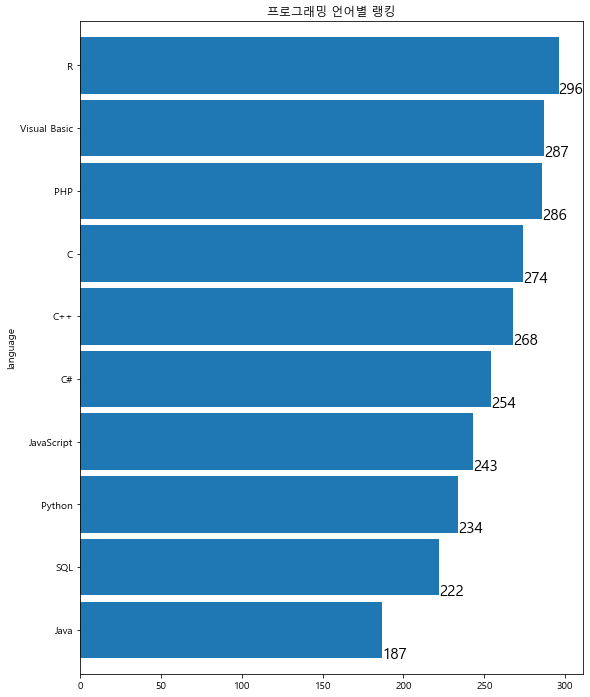

In [251]:
ax = df_gp["sum_cnt"].plot(kind="barh", figsize=(9, 12), width=0.9, title="프로그래밍 언어별 랭킹");
for p in ax.patches:
    text = str(p.get_width())
    x = p.get_width()
    y = p.get_y()
    ax.annotate(
        text=text,
        xy = ( x, y ),
        fontsize=15
    )

---

# 문제 4번
- 수집된 정보를 기반으로 우리나라의 컴퓨터 언어 관련 출판사 순위를 확인해 주세요.

In [252]:
df_excel.head(3)

,title,author,price,publisher,pubdate,isbn,language,rank
0,Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한),남상엽,30000.0,상학당,20200915,8965872022 9788965872023,Python,1
1,Python 프로그래밍,서문석,11500.0,퍼플,20170330,0000281298 1400000281291,Python,1
2,파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍,김병만|문창배,25000.0,카오스북,20180630,1187486183 9791187486183,Python,1


In [253]:
df_gp_pub = df_excel.groupby("publisher").agg(
    sum_cnt = ("isbn", "count")
)
df_gp_pub.sort_values("sum_cnt", ascending=True, inplace=True)

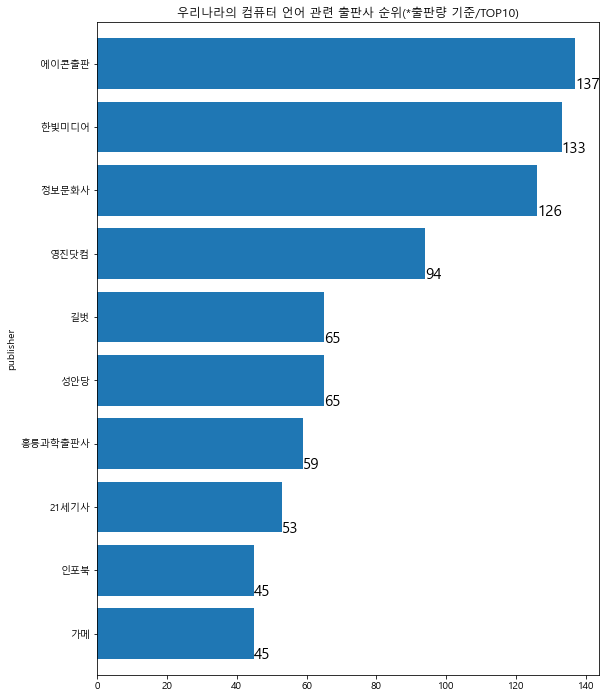

In [254]:
ax = df_gp_pub.tail(10)["sum_cnt"].plot(kind="barh", figsize=(9, 12), width=0.8, title="우리나라의 컴퓨터 언어 관련 출판사 순위(*출판량 기준/TOP10)");
for p in ax.patches:
    text = str(p.get_width())
    x = p.get_width()
    y = p.get_y()
    ax.annotate(
        text=text,
        xy = ( x, y ),
        fontsize=15
    )

---

# 문제 5번
- 수집된 정보에서 출판일 기준, 최근 2년간(20년, 21년) 데이터와 그 전 3년(17년, 18년, 19년) 데이터를 비교해주세요.

- 여기서 비교해야할 대상은 여러분들이 정하세요. 두 기간의 데이터를 관찰해서 특이한 사항들을 정리해주면 됩니다. 이 과정에서 역시 적절한 시각화도 고민해 주세요.

- 특히 어떤 특정 언어의 변화가 감지되면 강조해주세요.

In [255]:
df_excel["pubdate"] = df_excel["pubdate"].astype("str")

In [256]:
df_excel["year"] = df_excel["pubdate"].str.slice(0,4)
df_excel["pubdate"] = pd.to_datetime(df_excel["pubdate"], format="%Y%m%d")

In [258]:
df_excel.head()

,title,author,price,publisher,pubdate,isbn,language,rank,year
0,Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한),남상엽,30000.0,상학당,2020-09-15,8965872022 9788965872023,Python,1,2020
1,Python 프로그래밍,서문석,11500.0,퍼플,2017-03-30,0000281298 1400000281291,Python,1,2017
2,파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍,김병만|문창배,25000.0,카오스북,2018-06-30,1187486183 9791187486183,Python,1,2018
4,Python 프로그래밍의 이해,창병모,18000.0,교보문고,2017-01-17,1159090289 9791159090288,Python,1,2017
5,Python 프로그래밍 정복하기 (창의적 사고를 위한),강남오|김재호,25000.0,북스홀릭퍼블리싱,2016-02-01,1185123555 9791185123554,Python,1,2016


In [263]:
df_17_to_21 = df_excel[df_excel["year"].astype("int64") >= 2017]

In [270]:
df_excel_calculate = df_17_to_21.groupby(["language", "year"]).agg(
    avg_price = ("price", "mean"),
)
df_excel_calculate["avg_price"] = round(df_excel_calculate["avg_price"], 0)

In [284]:
df_pivot_data = df_excel_calculate.reset_index().pivot_table(index="year", columns="language", values="avg_price")

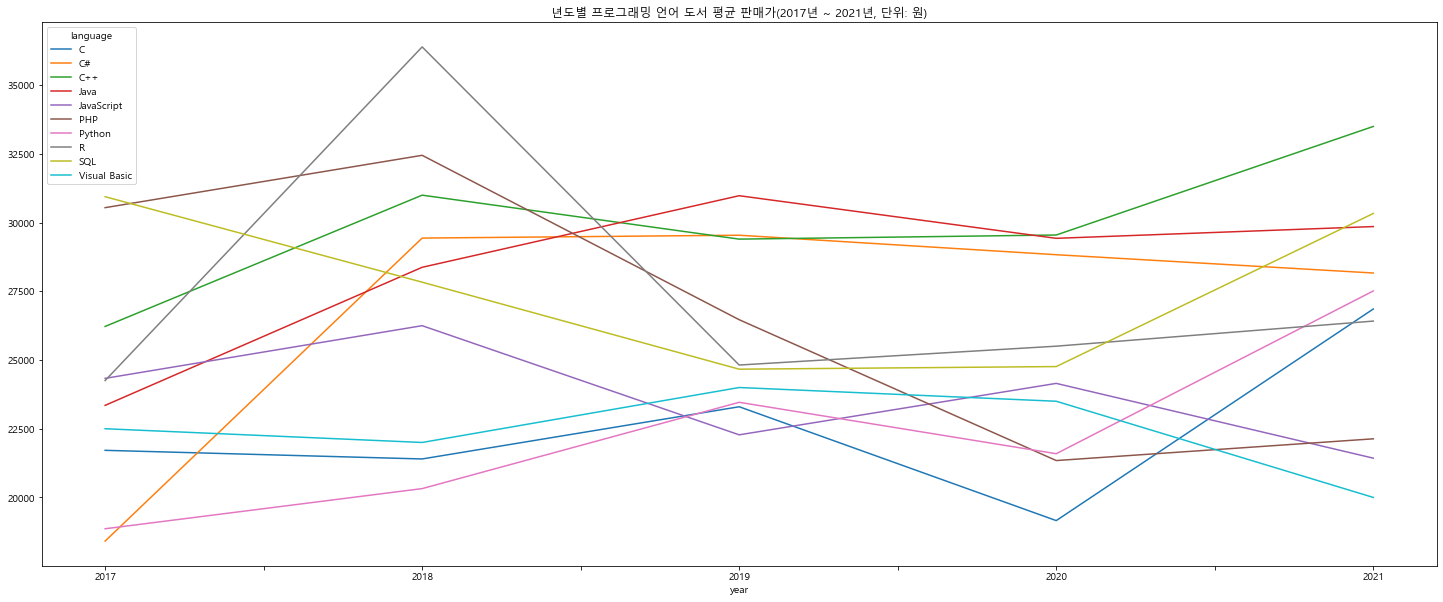

In [292]:
df_pivot_data.plot(figsize=(25, 10), title="년도별 프로그래밍 언어 도서 평균 판매가(2017년 ~ 2021년, 단위: 원)");

### 년도별 프로그래밍 언어 도서 평균 판매가(2017년 ~ 2021년, 단위: 원) 그래프 분석
- TIOBE 에서 현재 가장 인기있는 Python 언어를 먼저 판단해보겠다. 
    - 2017 ~ 2020년까지 Python 프로그래밍 관련 서적의 평균 판매가가 큰 상/하 폭이 없다가 2020년 이후 전년도 대비 평균 가격대가 상승하고 있는 것을 확인할 수 있다.
    - 데이터 사이언스, Flask, Django 등의 Python 분야가 젊은층 사이에 인기가 많아지고, 많은 교육 플랫폼에서 파이썬을 주제로한 강의와 책이 출간 되고 있기 때문에 인기와 더불어 가격이 상승한 것으로 보인다.
    - 하지만 Python이 가격이 많이 상승했지만, 실제로 질 좋은 무료 강의와 자료가 많아서 다른 프로그래밍 언어에 비해 아직까지도 평균 가격대 최상위는 아닌 것으로 판단된다.
- R 프로그래밍 언어의 급격한 도서 평균 판매가 하락을 살펴보자.
    - R 프로그래밍 언어는 데이터 분석 관련 학과라하면 모든 대학교에서 배우고, 현업 분석가에서도 많이 사용했으나.
    - Python의 인지도가 올라가면서 R보다 Python 수업을 하는 곳이 많아졌고, 실제로 출판 되는 도서량을 확인했을 때에도 Python에 밀린다고 말해도 과언은 아니게 되었다.
    - 때문에 Python의 인기 상승 시점부터 R은 하락 그래프를 그리기 시작한 것으로 판단된다.
- 그 외 언어들에 대하여
    - C#을 제외하고 2017 대비 2021년에 급한 변동폭을 그리는 언어는 없는 것으로 판단된다. Go의 출간으로 C 관련 프로그래밍 언어의 순위가 변동 될 수 있으나.
    - 대부분 인기, 인지도면에서 큰 상승,하락이 없었던 것으로 판단 된다.
    - 또한 꾸준히 백엔드, 프론트엔드 등의 분야에서 많이 사용되고, 인력 시장도 많이 열려있는 편으로 그만큼 꾸준히, 평균가에 크게 벗어나지 않으면서 출간 되는 것으로 판단된다.